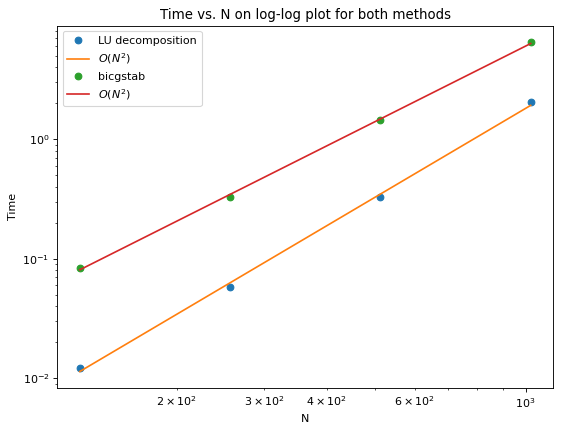

In [1]:
import numpy as np
from numpy.linalg import norm 
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.linalg
import scipy.sparse.linalg
import scipy.optimize
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt
import time

Time = 2
L = 10
n = 128
x2 = np.linspace(-L,L,n+1)
x = x2[0:n] #periodicity
dx = x[1] - x[0]

#time
t = np.linspace(0, 2, 501)
dt = t[1] - t[0]
time_steps = int(Time/dt)

# CFL number
CFL = 2*dt/(dx**2)
L_star = CFL

e1 = np.ones(n)
B = 0.5*scipy.sparse.spdiags([-CFL*e1,-CFL*e1,2*CFL*e1,-CFL*e1,-CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
B = B + scipy.sparse.eye(n)
C = 0.5*scipy.sparse.spdiags([CFL*e1,CFL*e1,-2*CFL*e1,CFL*e1,CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
C = C + scipy.sparse.eye(n)

time_LU = []
PLU = scipy.sparse.linalg.splu(B)
usol_cn_1 =np.zeros((len(x),len(t)))
u0 = 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L)
usol_cn_1[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1 = PLU.solve(C@u0)
    u0=u1
    usol_cn_1[:,j+1] = u1

end = time.time()
result = end - start
time_LU.append(result)

time_bicg = []
usol_cn_2 =np.zeros((len(x),len(t)))
u0 = 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L)
usol_cn_2[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1, exit_code = scipy.sparse.linalg.bicgstab(B, C@u0)
    u0=u1
    usol_cn_2[:,j+1] = u1

end = time.time()
result = end - start
time_bicg.append(result)

Time = 2
L = 10
n = 256
x2 = np.linspace(-L,L,n+1)
x = x2[0:n] #periodicity
dx = x[1] - x[0]

dt = L_star*(dx**2)/2
time_steps = int(Time/dt)
t = np.arange(0,Time+dt,dt)

e1 = np.ones(n)
B = 0.5*scipy.sparse.spdiags([-CFL*e1,-CFL*e1,2*CFL*e1,-CFL*e1,-CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
B = B + scipy.sparse.eye(n)
C = 0.5*scipy.sparse.spdiags([CFL*e1,CFL*e1,-2*CFL*e1,CFL*e1,CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
C = C + scipy.sparse.eye(n)

PLU = scipy.sparse.linalg.splu(B)
usol_cn_3 =np.zeros((len(x),len(t)))
u0 = 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L)
usol_cn_3[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1 = PLU.solve(C@u0)
    u0=u1
    usol_cn_3[:,j+1] = u1

end = time.time()
result = end - start
time_LU.append(result)

usol_cn =np.zeros((len(x),len(t)))
u0 = 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L)
usol_cn[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1, exit_code = scipy.sparse.linalg.bicgstab(B, C@u0)
    u0=u1
    usol_cn[:,j+1] = u1

end = time.time()
result = end - start
time_bicg.append(result)

Time = 2
L = 10
n = 512
x2 = np.linspace(-L,L,n+1)
x = x2[0:n] #periodicity
dx = x[1] - x[0]

dt = L_star*(dx**2)/2
time_steps = int(Time/dt)
t = np.arange(0,Time+dt,dt)

e1 = np.ones(n)
B = 0.5*scipy.sparse.spdiags([-CFL*e1,-CFL*e1,2*CFL*e1,-CFL*e1,-CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
B = B + scipy.sparse.eye(n)
C = 0.5*scipy.sparse.spdiags([CFL*e1,CFL*e1,-2*CFL*e1,CFL*e1,CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
C = C + scipy.sparse.eye(n)

PLU = scipy.sparse.linalg.splu(B)
usol_cn =np.zeros((len(x),len(t)))
u0 = 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L)
usol_cn[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1 = PLU.solve(C@u0)
    u0=u1
    usol_cn[:,j+1] = u1

end = time.time()
result = end - start
time_LU.append(result)

usol_cn =np.zeros((len(x),len(t)))
u0 = 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L)
usol_cn[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1, exit_code = scipy.sparse.linalg.bicgstab(B, C@u0)
    u0=u1
    usol_cn[:,j+1] = u1

end = time.time()
result = end - start
time_bicg.append(result)

Time = 2
L = 10
n = 1024
x2 = np.linspace(-L,L,n+1)
x = x2[0:n] #periodicity
dx = x[1] - x[0]

dt = L_star*(dx**2)/2
time_steps = int(Time/dt)
t = np.arange(0,Time+dt,dt)

e1 = np.ones(n)
B = 0.5*scipy.sparse.spdiags([-CFL*e1,-CFL*e1,2*CFL*e1,-CFL*e1,-CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
B = B + scipy.sparse.eye(n)
C = 0.5*scipy.sparse.spdiags([CFL*e1,CFL*e1,-2*CFL*e1,CFL*e1,CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
C = C + scipy.sparse.eye(n)

PLU = scipy.sparse.linalg.splu(B)
usol_cn =np.zeros((len(x),len(t)))
u0 = 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L)
usol_cn[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1 = PLU.solve(C@u0)
    u0=u1
    usol_cn[:,j+1] = u1

end = time.time()
result = end - start
time_LU.append(result)

usol_cn =np.zeros((len(x),len(t)))
u0 = 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L)
usol_cn[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1, exit_code = scipy.sparse.linalg.bicgstab(B, C@u0)
    u0=u1
    usol_cn[:,j+1] = u1

end = time.time()
result = end - start
time_bicg.append(result)

n = [128, 256, 512, 1024]
slope_LU, intercept_LU = np.polyfit(np.log(n), np.log(time_LU), 1)
slope_bicg, intercept_bicg = np.polyfit(np.log(n), np.log(time_bicg), 1)

plt.figure(figsize=(8, 6), dpi=80)
plt.loglog(n, time_LU, 'o', label='LU decomposition')
plt.loglog(n, (n**slope_LU)*np.exp(intercept_LU), label='$O(N^2)$')
plt.loglog(n, time_bicg, 'o', label='bicgstab')
plt.loglog(n, (n**slope_bicg)*np.exp(intercept_bicg), label='$O(N^2)$')
plt.xlabel('N')
plt.ylabel('Time')
plt.title('Time vs. N on log-log plot for both methods')
plt.legend()
plt.savefig('Time_loglog_plot.png')
plt.show()

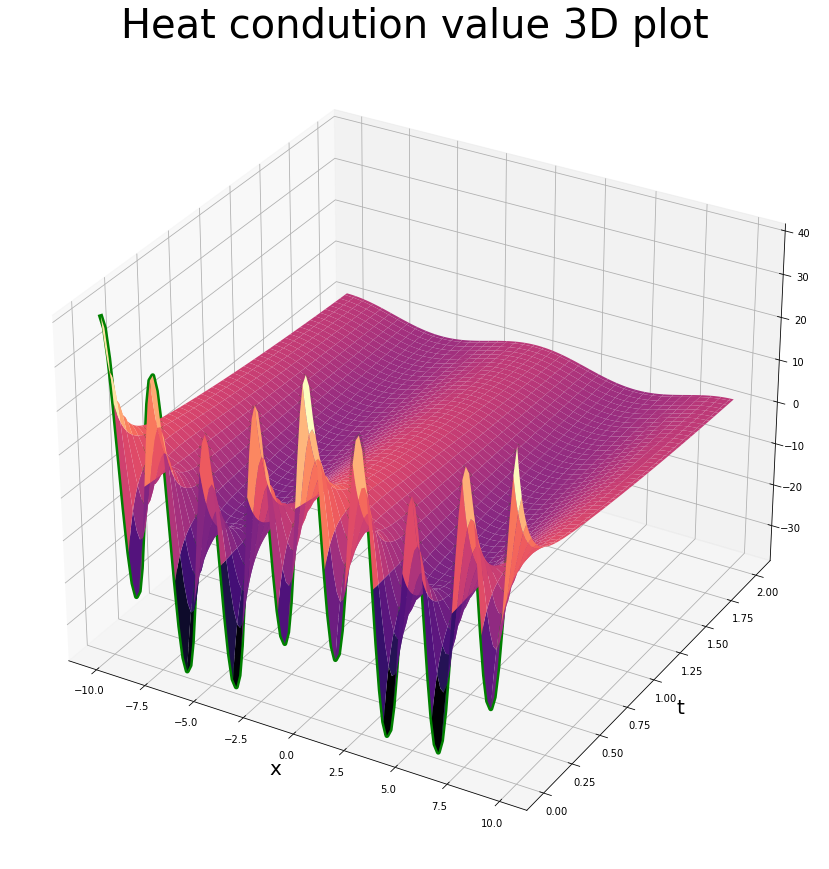

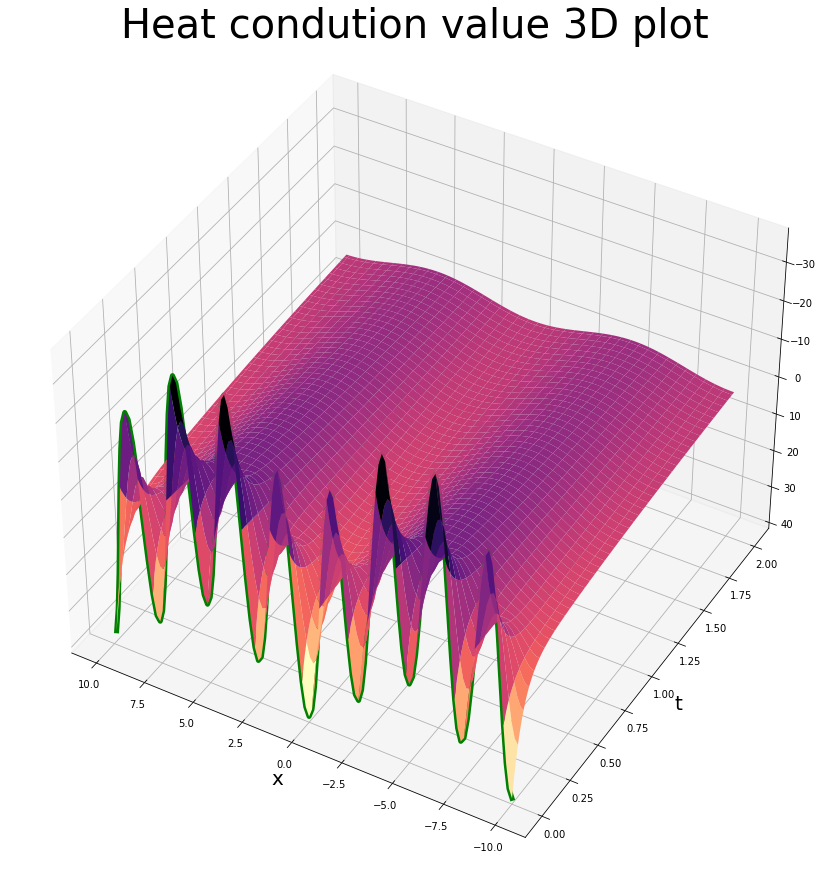

In [59]:
Time = 2
L = 10
n = 128
x2 = np.linspace(-L,L,n+1)
x = x2[0:n] #periodicity
dx = x[1] - x[0]

#time
t = np.linspace(0, 2, 501)
dt = t[1] - t[0]
time_steps = int(Time/dt)

# CFL number
CFL = 2*dt/(dx**2)
L_star = CFL

e1 = np.ones(n)
B = 0.5*scipy.sparse.spdiags([-CFL*e1,-CFL*e1,2*CFL*e1,-CFL*e1,-CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
B = B + scipy.sparse.eye(n)
C = 0.5*scipy.sparse.spdiags([CFL*e1,CFL*e1,-2*CFL*e1,CFL*e1,CFL*e1],[-n+1,-1,0,1,n-1],n,n,format='csc')
C = C + scipy.sparse.eye(n)

usol_cn_2 =np.zeros((len(x),len(t)))
u0 = 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L)
usol_cn_2[:,0] = u0
start = time.time()
for j in range(time_steps):
    u1, exit_code = scipy.sparse.linalg.bicgstab(B, C@u0)
    u0=u1
    usol_cn_2[:,j+1] = u1

end = time.time()
result = end - start
sol = usol_cn_2

X, T = np.meshgrid(x,t)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize =(20, 15))
surf = ax.plot_surface(X, T, sol.T,cmap='magma')
ax.plot3D(x, 0*x, 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L),'-g',linewidth=5)
plt.xlabel('x', fontsize = 20)
plt.ylabel('t', fontsize = 20)
ax.set_title('Heat condution value 3D plot', fontsize = 40)
plt.savefig('3d-plot1.pdf')
plt.show()

X, T = np.meshgrid(x,t)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize =(20, 15))
surf = ax.plot_surface(X, T, sol.T,cmap='magma')
ax.plot3D(x, 0*x, 10*np.cos(2*np.pi*x/L)+30*np.cos(8*np.pi*x/L),'-g',linewidth=5)
plt.xlabel('x', fontsize = 20)
plt.ylabel('t', fontsize = 20)
ax.view_init(-140, 60)
ax.set_title('Heat condution value 3D plot', fontsize = 40)
plt.savefig('3d-plot2.pdf')
plt.show()